<a href="https://colab.research.google.com/github/Seeeeiu/Python/blob/master/HW1_P1_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework 1 - Part 1 - Task 2
You will use spectral clustering to perform image segmentation

In [0]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

Generate an image with two circles (cells)

Text(0.5, 1.05, 'an image of two touching cells')

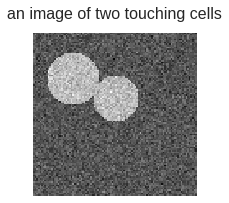

In [2]:
#read but not modify
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
l = 100
x, y = np.indices((l, l))
center1 = (28, 24)
center2 = (40, 50)
radius1, radius2, radius3, radius4 = 16, 14, 15, 14
circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)
#show
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.matshow(img, cmap='gray')
ax.axis('off')
ax.set_title('an image of two touching cells', fontsize=16)

In [3]:
img.shape

(100, 100)

You may find some code for image segmentation <br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html <br>
I copy the code here

Text(0.5, 1.05, 'label')

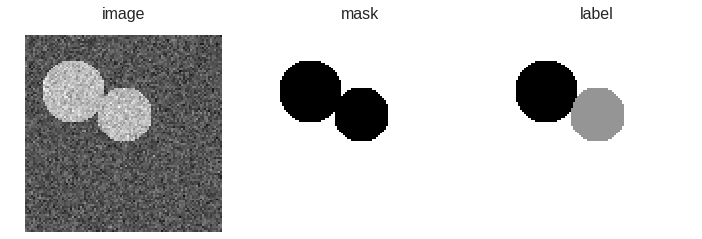

In [4]:
#read but not modify
graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())
labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels
#show
fig, ax = plt.subplots(1, 3, figsize=(12,6))
ax[0].matshow(img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('image', fontsize=16)
ax[1].matshow(mask)
ax[1].axis('off')
ax[1].set_title('mask', fontsize=16)
ax[2].matshow(label_im)
ax[2].axis('off')
ax[2].set_title('label', fontsize=16)

This example is somewhat 'cheating' by using a mask <br>
It is diffcult to find such a mask if the image has complex background <br>
Next, let's try the above code without mask <br>
To see some meaningful results, we may need to set n_clusters to 16

Text(0.5, 1.05, 'label')

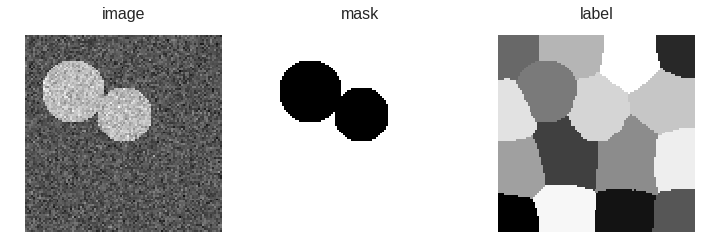

In [67]:
#read but not modify
graph = image.img_to_graph(img)
graph.data = np.exp(-graph.data / graph.data.std())
labels = spectral_clustering(graph, n_clusters=16, eigen_solver='arpack') # you can try different n_clusters
label_im=labels.reshape(100,100)
#show
fig, ax = plt.subplots(1, 3, figsize=(12,6))
ax[0].matshow(img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('image', fontsize=16)
ax[1].matshow(mask)
ax[1].axis('off')
ax[1].set_title('mask', fontsize=16)
ax[2].matshow(label_im)
ax[2].axis('off')
ax[2].set_title('label', fontsize=16)

### Your task
You will create a different similarity matrix as the input to the function `spectral_clustering` <br>
Similarity matrix is also called affinity matrix. Let's name it `SimMat` <br>
Here is the definition of the similarity: <br>
x_n is a data point, and it contains three numbers: the normalized pixel location `(i/100, j/100)` and pixel value `a` at `(i,j)` <br>
where `i` is row-index, and `j` is column-index. <br>
Given two data points, x_1=(i1/100, j1/100, a1), x_2=(i2/100, j2/100, a2)  <br>
spatial_distance(x_1, x_2) = sqrt((i1/100 - i2/100)^2+(j1/100 - j2/100)^2) <br>
Similarity(x_1, x_2) = exp(-||x_1 - x_2||^2) if spatial_distance(x_1, x_2) <= 0.3  <br>
Similarity(x_1, x_2) = 0, otherwise   <br>
You may need pdist and squareform from scipy.spatial.distanc

In [0]:
import math as m
def similarity_func(u, v):
  if euclidean(u/100,v/100) <=0.3:
    return m.exp(-(np.linalg.norm(u/100-v/100))**2)
  else:
    return 0

from scipy.spatial.distance import euclidean, pdist, squareform
dist = pdist(img,similarity_func)
SimMat = squareform(dist)
SimMat = image.img_to_graph(SimMat)

In [80]:
SimMat.shape

(10000, 10000)

Apply spectral_clustering using the new similarity matrix `SimMat` <br>
Show the result

Text(0.5, 1.05, 'label')

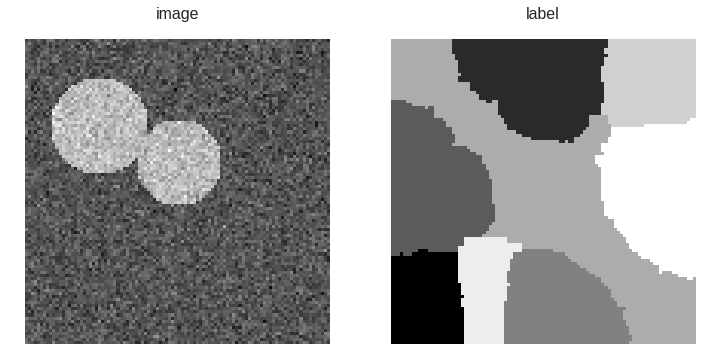

In [83]:
#read but not modify
labels = spectral_clustering(SimMat, n_clusters=8, eigen_solver='arpack')
label_im=labels.reshape(100,100)
#show
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].matshow(img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('image', fontsize=16)
ax[1].matshow(label_im)
ax[1].axis('off')
ax[1].set_title('label', fontsize=16)

The result is not perfect, but it is slightly better <br>
The purpose is to show that the definition of similarity determines the result (given n_clusters)